In [24]:
%matplotlib notebook
#Loading data, Pandas, etc.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats



In [25]:
#First the school data
#Getting all the school data from the NEOCANDO files
TestsFile="SchoolsData/Grades3through11clean.csv"
TestsOrig=pd.read_csv(TestsFile)

#I manually split all the data by year, and this section loads all the data into seperate Pandas 
#find the mean score for each neighborhood for each year
#by neighborhood by year so we can tease out trends
Tendata='SchoolsData/2010Schoolsdata.csv'
Ten_df=pd.read_csv(Tendata)
Ten_df["2010 Neighborhood Average"]=Ten_df.mean(axis=1)
Elevendata="SchoolsData/2011Schools.csv"
Eleven_df=pd.read_csv(Elevendata)
Eleven_df["2011 Neighborhood Average"]=Eleven_df.mean(axis=1)
Twelvedata="SchoolsData/2012SchoolsData.csv"
Twelve_df=pd.read_csv(Twelvedata)
Twelve_df["2012 Neighborhood Average"]=Twelve_df.mean(axis=1)
Thirteendata="SchoolsData/2013SchoolsData.csv"
Thirteen_df=pd.read_csv(Thirteendata)
Thirteen_df["2013 Neighborhood Average"]=Thirteen_df.mean(axis=1)
Fourteendata="SchoolsData/2014ShcoolsData.csv"
Fourteen_df=pd.read_csv(Fourteendata)
Fourteen_df["2014 Neighborhood Average"]=Fourteen_df.mean(axis=1)
Fifteendata="SchoolsData/2015SchoolData.csv"
Fifteen_df=pd.read_csv(Fifteendata)
Fifteen_df["2015 Neighborhood Average"]=Fifteen_df.mean(axis=1)
Sixteendata="SchoolsData/2016SchoolData.csv"
Sixteen_df=pd.read_csv(Sixteendata)
Sixteen_df["2016 Neighborhood Average"]=Sixteen_df.mean(axis=1)

#Creates a new file that only has the neighborhoods and the test score averages as columns
school_trend_df=TestsOrig[["Neighborhood"]]
school_trend_df["2010"]=Ten_df["2010 Neighborhood Average"]
school_trend_df["2011"]=Eleven_df["2011 Neighborhood Average"]
school_trend_df["2012"]=Twelve_df["2012 Neighborhood Average"]
school_trend_df["2013"]=Thirteen_df["2013 Neighborhood Average"]
school_trend_df["2014"]=Fourteen_df["2014 Neighborhood Average"]
school_trend_df["2015"]=Fifteen_df["2015 Neighborhood Average"]
school_trend_df["2016"]=Sixteen_df["2016 Neighborhood Average"]
school_trend_df = school_trend_df.set_index("Neighborhood")

/Users/NBLaptop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/NBLaptop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/NBLaptop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

<IPython.core.display.Javascript object>


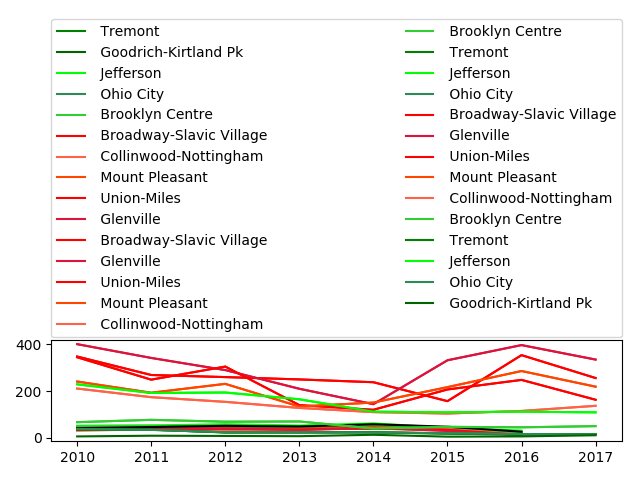

In [26]:
#Now that I have the data, I can plot line graphs. 
#first need a years array to do the x-axis

years=["2010","2011","2012","2013","2014","2015","2016"]

#The neighborhood names have weird numbers because I orgianlly plotted all 33 neighborhoods with data one by one
#These are the low involvement neighborhoods, they will be various shades of green on the line chart
neighborhood_thirty, = plt.plot(years, school_trend_df.loc[' Tremont',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="green")
neighborhood_three, = plt.plot(years, school_trend_df.loc[' Goodrich-Kirtland Pk',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="darkgreen") 
neighborhood_twenty, = plt.plot(years, school_trend_df.loc[' Jefferson',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="lime")
neighborhood_twentyseven, = plt.plot(years, school_trend_df.loc[' Ohio City',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="seagreen")
neighborhood_seven, = plt.plot(years, school_trend_df.loc[' Brooklyn Centre',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="limegreen")

#These are the high involvement neighborhoods. They will be various shades of red
neighborhood_six, = plt.plot(years, school_trend_df.loc[' Broadway-Slavic Village',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="red")
neighborhood_twelve, = plt.plot(years, school_trend_df.loc[' Collinwood-Nottingham',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="tomato")
neighborhood_twentyfive, = plt.plot(years, school_trend_df.loc[' Mount Pleasant',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="orangered")
neighborhood_thirtyone, = plt.plot(years, school_trend_df.loc[' Union-Miles',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="r")
neighborhood_eighteen, = plt.plot(years, school_trend_df.loc[' Glenville',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="crimson")

#the data is very noisy -- 2016 scores were so much worse than previous years they had to change graduation requirements
#so the generic suburban data is used to show trends
neighborhood_one, = plt.plot(years, school_trend_df.loc['_Suburb',["2010","2011","2012","2013","2014", "2015","2016"]], 
                             color="black")

#this is the legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)

plt.tight_layout()

plt.savefig('SchoolsData/test_performance.png')

In [22]:
#Getting ready for stats, manually created csvs with only 
#low involvement neighborhhoods and high involvement neighborhoods
#this obviates the need for inconveniant string variables with neighborhood names
LowInvolvementFile="SchoolsData/LowEducbyneigh2.csv"
LowInvFile=pd.read_csv(LowInvolvementFile)
LowInvFile=LowInvFile[["2010","2011","2012","2013","2014","2015","2016"]]
HighInvolvementFile="SchoolsData/HighEducbyneigh.csv"
HighInvolveFile=pd.read_csv(HighInvolvementFile)
HighInvolveFile=HighInvolveFile[["2010","2011","2012","2013","2014","2015","2016"]]

#To get rid of the noise in changing test scores I subtract the suburban scores from all my neighborhood scores
LowInvFileSubDif_pd=LowInvFile.copy()-school_trend_df.loc['_Suburb',["2010","2011","2012","2013","2014","2015","2016"]]
HighInvFileFDif_pd=HighInvolveFile.copy()-school_trend_df.loc['_Suburb',["2010","2011","2012","2013","2014", "2015","2016"]]

#If the land bank is not changing test scores there should be a strong statistical relationship between scores in
#low involvement neighborhoods vs. high invlvement as the high involvement neighborhoods should be trending up
#relative to the rest of the county whilst the low involvment neighborhoods remain stable
stats.ttest_ind(LowInvFileSubDif_pd, HighInvFileFDif_pd)

Ttest_indResult(statistic=array([9.35983265, 6.11359353, 5.17652858, 7.45770055, 2.21798661,
       5.26095049, 4.46843839]), pvalue=array([1.38787037e-05, 2.85170586e-04, 8.46342784e-04, 7.21148008e-05,
       5.73619772e-02, 7.63622391e-04, 2.08755103e-03]))

In [28]:
#Foreclosures line graph made same way the above line graphs were made
#read in the file
BigFile="indicators.csv"
BigPd=pd.read_csv(BigFile)
#need a new years variable because we have no 2017 school data, but we do have foreclosure data
years2=["2010","2011","2012","2013","2014","2015","2016", "2017"]

#Making a dataframe that only has foreclosure data
Forclosures_pd=BigPd[["Neighborhood","forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]]
Forclosures_pd = Forclosures_pd.set_index("Neighborhood")

#the high involvement neighborhoods, in red
foreclosures_one, = plt.plot(years2, Forclosures_pd.loc[' Broadway-Slavic Village',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="red")
foreclosures_two, = plt.plot(years2, Forclosures_pd.loc[' Glenville',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="crimson")
foreclosures_three, = plt.plot(years2, Forclosures_pd.loc[' Union-Miles',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="r")
foreclosures_four, = plt.plot(years2, Forclosures_pd.loc[' Mount Pleasant',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="orangered")
foreclosures_five, = plt.plot(years2, Forclosures_pd.loc[' Collinwood-Nottingham',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="tomato")

#low involvement neighborhoods in green
foreclosures_six, = plt.plot(years2, Forclosures_pd.loc[' Brooklyn Centre',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="limegreen")
foreclosures_seven, = plt.plot(years2, Forclosures_pd.loc[' Tremont',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="green")
foreclosures_eight, = plt.plot(years2, Forclosures_pd.loc[' Jefferson',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="lime")
foreclosures_nine, = plt.plot(years2, Forclosures_pd.loc[' Ohio City',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="seagreen")
foreclosures_ten, = plt.plot(years2, Forclosures_pd.loc[' Goodrich-Kirtland Pk',["forcl_10","forcl_11","forcl_12","forcl_13","forcl_14",'forcl_15',"forcl_16","forcl_17"]], 
                             color="darkgreen")

#showing the legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.savefig('SchoolsData/nick_forclosure.png')

We started with the Indicators csv file and began to and sorted out the neighborhoods we wanted to target in the analysis.  We then broke the data down further by just pulling out the crime stats for our selected observation period.  We created a bar chart showing each selected neighborhood and the crime data for all three years per neighborhood.  From the visualization we can glean that the crime has increased in 80% of the chosen neighborhoods from 2010 to 2013, decreased in 70% of them in 2017.

In [33]:
# Load in csv
indicators_df = pd.read_csv("indicators.csv")
# Reorganizing the columns using double brackets
indicators_11_df = indicators_df[["Neighborhood","viol_10","viol_13", "viol_17"]]

<IPython.core.display.Javascript object>


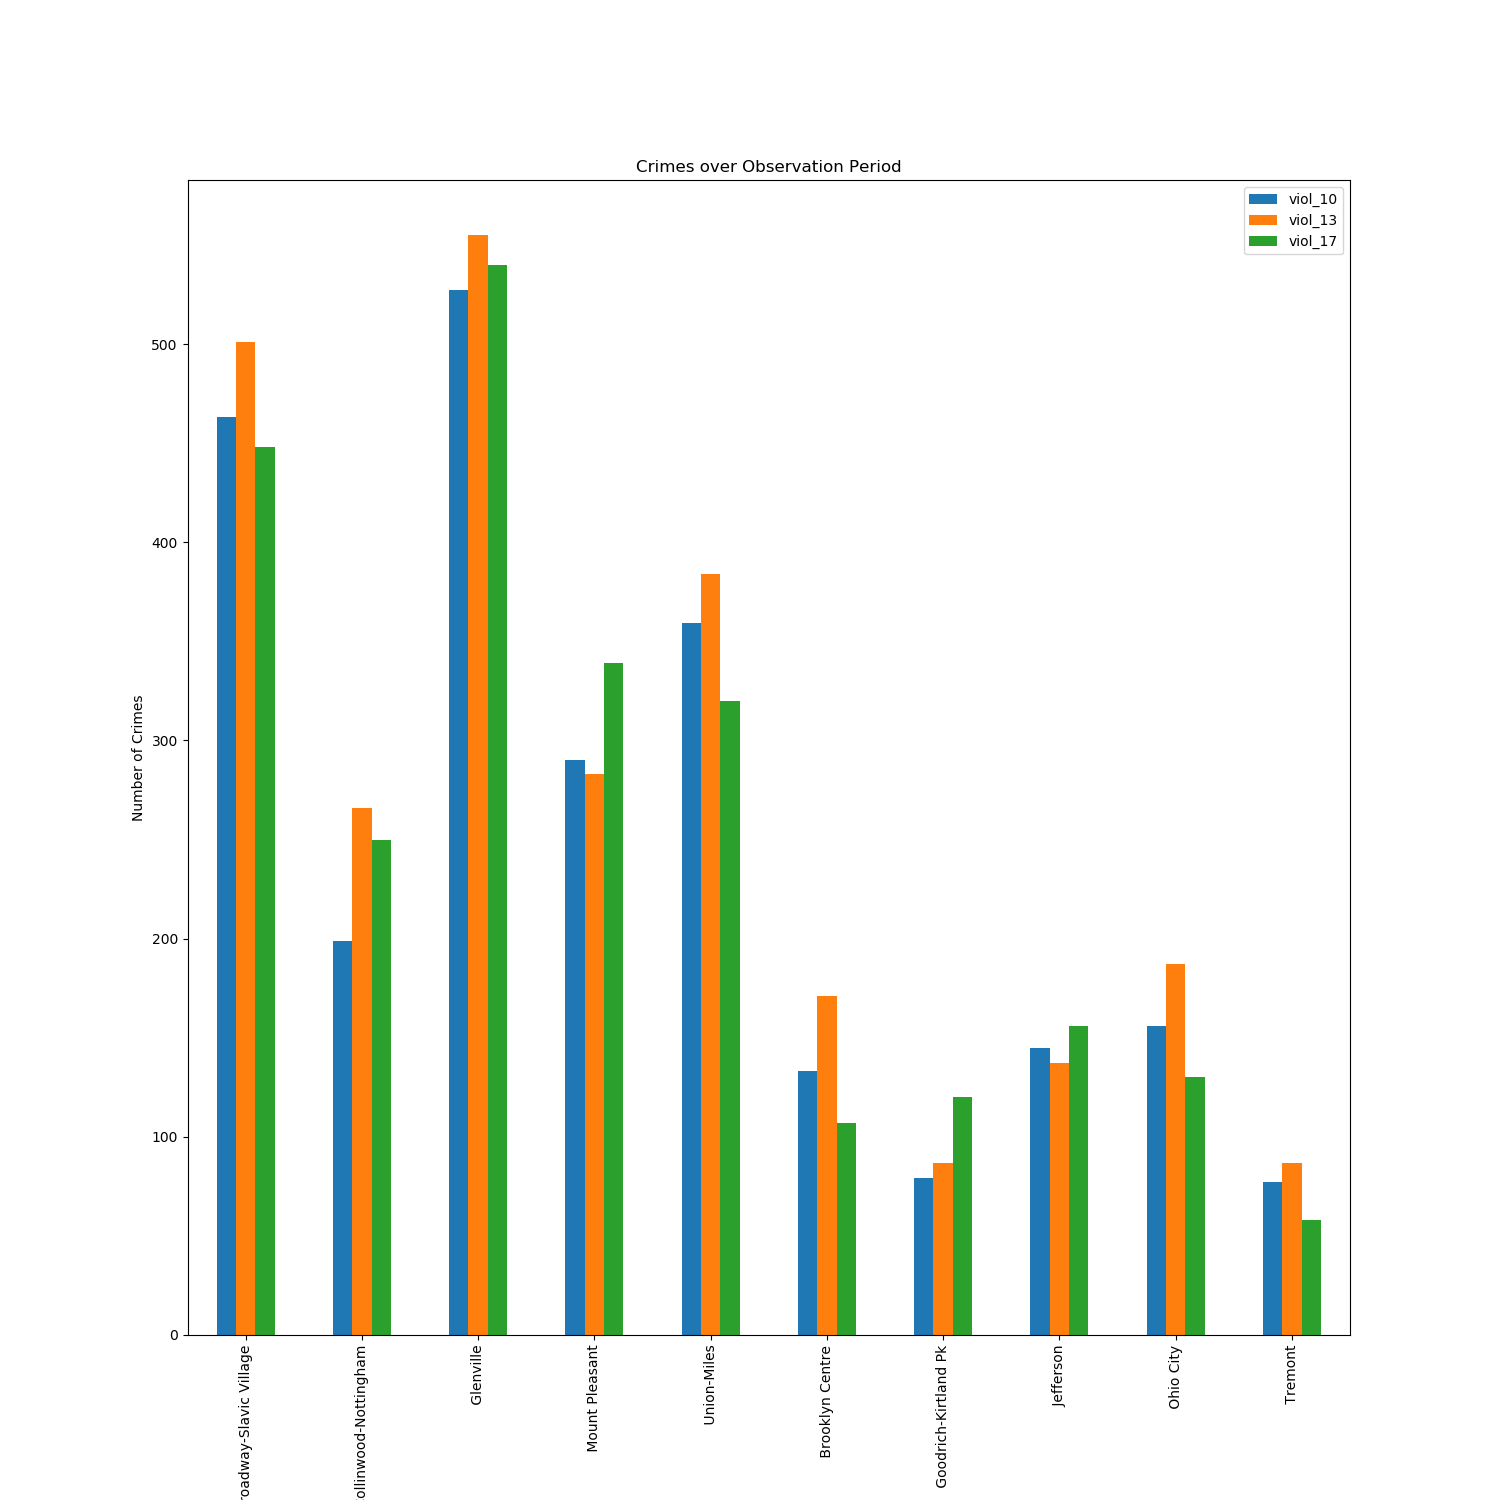

In [35]:
#creating the crime bar graph
indicators_11_df.set_index("Neighborhood")
indicators_11_df.plot.bar(x='Neighborhood')
plt.title("Crimes over Observation Period")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Crimes")
# Sets the x and y params
plt.rcParams['figure.figsize']= (15,15)
# Save an image of the chart and print it to the screen
plt.savefig("series_crime.png")
plt.show()